In [1]:
# Импортируем все необходимые для работы в данном проекте библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

# Загружаем исходную базу для анализа
math = pd.read_csv('stud_math.xls')

In [2]:
# Рассмотрим, какие данные хранятся в файле
# и какие типы данных у столбцов:

display(math.head(5))
math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [3]:
# Создадим списки столбцов основных типов данных
# и будем наполнять их по ходу продвижения по таблице

binar_col = [] #Список столбцов с бинарными значениями типа 1/2
yes_no_col = [] #Список столбцов с бинарными значениями типа 0/1
category_col = [] #Список столбцов с категориальными значениями

### school

In [4]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.school.value_counts()))
print("Уникальных значений:", math.school.nunique())
math.loc[:, ['school']].info()

,school
GP,349
MS,46


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
school    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [5]:
#Добавим имя столбца в соответствующий список
binar_col.append('school')

### sex

In [6]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.sex.value_counts()))
print("Уникальных значений:", math.sex.nunique())
math.loc[:, ['sex']].info()

,sex
F,208
M,187


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
sex    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [7]:
#Доавим имя столбца в соответствующий список
binar_col.append('sex')

### age

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Уникальных значений: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
age    395 non-null int64
dtypes: int64(1)
memory usage: 3.2 KB


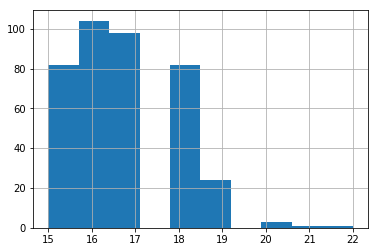

In [8]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.age.value_counts()))
print("Уникальных значений:", math.age.nunique())
math.loc[:, ['age']].info()
math.age.hist(bins = 10)

### address

In [9]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.address.value_counts()))
print("Уникальных значений:", math.address.nunique())
math.loc[:, ['address']].info()

,address
U,295
R,83


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
address    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [10]:
#Добавим имя столбца в соответствующий список
binar_col.append('address')

### famsize

In [11]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.famsize.value_counts()))
print("Уникальных значений:", math.famsize.nunique())
math.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsize    368 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [12]:
#Добавим имя столбца в соответствующий список
binar_col.append('famsize')

### Pstatus

In [13]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.Pstatus.value_counts()))
print("Уникальных значений:", math.Pstatus.nunique())
math.loc[:, ['Pstatus']].info()

,Pstatus
T,314
A,36


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Pstatus    350 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [14]:
#Добавим имя столбца в соответствующий список
binar_col.append('Pstatus')

### Medu

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Medu    392 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


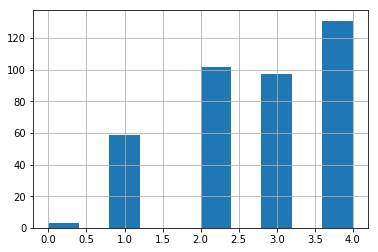

In [15]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.Medu.value_counts()))
print("Уникальных значений:", math.Medu.nunique())
math.loc[:, ['Medu']].info()
math.Medu.hist()

### Fedu

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fedu    371 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


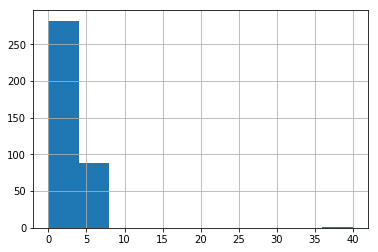

In [16]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.Fedu.value_counts()))
print("Уникальных значений:", math.Fedu.nunique())
math.loc[:, ['Fedu']].info()
math.Fedu.hist()

In [17]:
math.Fedu = math.Fedu[math.Fedu <= 4] #Отсекаем по верхней границе допуска из условий задания

### Mjob

In [18]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.Mjob.value_counts()))
print("Уникальных значений:", math.Mjob.nunique())
math.loc[:, ['Mjob']].info()

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Mjob    376 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [19]:
#Добавим имя столбца в соответствующий список
category_col.append('Mjob')

### Fjob

In [20]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.Fjob.value_counts()))
print("Уникальных значений:", math.Fjob.nunique())
math.loc[:, ['Fjob']].info()

,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
Fjob    359 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [21]:
#Добавим имя столбца в соответствующий список
category_col.append('Fjob')

### reason

In [22]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.reason.value_counts()))
print("Уникальных значений:", math.reason.nunique())
math.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [23]:
#Добавим имя столбца в соответствующий список
category_col.append('reason')

### guardian

In [24]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.guardian.value_counts()))
print("Уникальных значений:", math.guardian.nunique())
math.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,28


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [25]:
#Добавим имя столбца в соответствующий список
category_col.append('guardian')

### traveltime

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


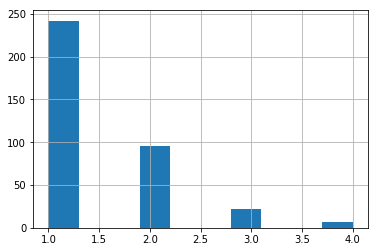

In [26]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.traveltime.value_counts()))
print("Уникальных значений:", math.traveltime.nunique())
math.loc[:, ['traveltime']].info()
math.traveltime.hist()

### studytime

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


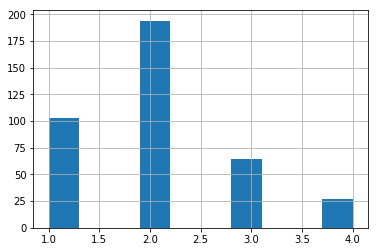

In [27]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.studytime.value_counts()))
print("Уникальных значений:", math.studytime.nunique())
math.loc[:, ['studytime']].info()
math.studytime.hist()

### failures

,failures
0.0,293
1.0,49
2.0,16
3.0,15


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    373 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


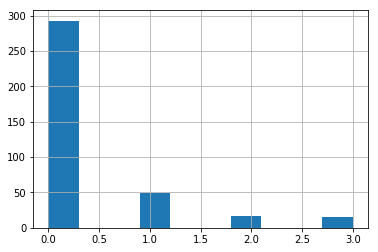

In [28]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.failures.value_counts()))
print("Уникальных значений:", math.failures.nunique())
math.loc[:, ['failures']].info()
math.failures.hist()

### schoolsup

In [29]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.schoolsup.value_counts()))
print("Уникальных значений:", math.schoolsup.nunique())
math.loc[:, ['schoolsup']].info()

,schoolsup
no,335
yes,51


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
schoolsup    386 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [30]:
#Добавим имя столбца в соответствующий список
yes_no_col.append('schoolsup')

### famsup

In [31]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.famsup.value_counts()))
print("Уникальных значений:", math.famsup.nunique())
math.loc[:, ['famsup']].info()

,famsup
yes,219
no,137


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famsup    356 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [32]:
#Добавим имя столбца в соответствующий список
yes_no_col.append('famsup')

### paid

In [33]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.paid.value_counts()))
print("Уникальных значений:", math.paid.nunique())
math.loc[:, ['paid']].info()

,paid
no,200
yes,155


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
paid    355 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [34]:
#Добавим имя столбца в соответствующий список
yes_no_col.append('paid')

### activities

In [35]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.activities.value_counts()))
print("Уникальных значений:", math.activities.nunique())
math.loc[:, ['activities']].info()

,activities
yes,195
no,186


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
activities    381 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [36]:
#Добавим имя столбца в соответствующий список
yes_no_col.append('activities')

### nursery

In [37]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.nursery.value_counts()))
print("Уникальных значений:", math.nursery.nunique())
math.loc[:, ['nursery']].info()

,nursery
yes,300
no,79


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
nursery    379 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [38]:
#Добавим имя столбца в соответствующий список
yes_no_col.append('nursery')

### studytime, granular

In [39]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math['studytime, granular'].value_counts()))
print("Уникальных значений:", math['studytime, granular'].nunique())
math.loc[:, ['studytime, granular']].info()

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime, granular    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [40]:
# Проверим корелляцию studytime, granular с studytime
math[['studytime','studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


In [41]:
# Т.к. studytime, granular скоррелирован с studytime, можем его удалить
del math['studytime, granular']

### higher

In [42]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.higher.value_counts()))
print("Уникальных значений:", math.higher.nunique())
math.loc[:, ['higher']].info()

,higher
yes,356
no,19


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
higher    375 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [43]:
#Добавим имя столбца в соответствующий список
yes_no_col.append('higher')

### internet

In [44]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.internet.value_counts()))
print("Уникальных значений:", math.internet.nunique())
math.loc[:, ['internet']].info()

,internet
yes,305
no,56


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
internet    361 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [45]:
#Добавим имя столбца в соответствующий список
yes_no_col.append('internet')

### romantic

In [46]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.romantic.value_counts()))
print("Уникальных значений:", math.romantic.nunique())
math.loc[:, ['romantic']].info()

,romantic
no,240
yes,124


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
romantic    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


In [47]:
#Добавим имя столбца в соответствующий список
yes_no_col.append('romantic')

### famrel

In [48]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.famrel.value_counts()))
print("Уникальных значений:", math.famrel.nunique())
math.loc[:, ['famrel']].info()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Уникальных значений: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    368 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


In [49]:
# Т.к. -1 значения быть по условиям не должно, удалим его
math.famrel = math.famrel[math.famrel >0]

### freetime

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    384 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


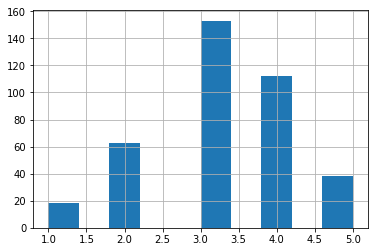

In [50]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.freetime.value_counts()))
print("Уникальных значений:", math.freetime.nunique())
math.loc[:, ['freetime']].info()
math.freetime.hist()

### goout

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    387 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


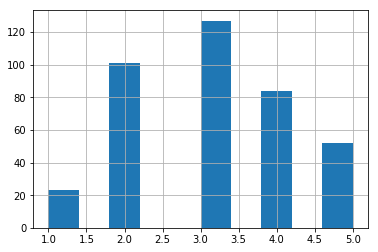

In [51]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.goout.value_counts()))
print("Уникальных значений:", math.goout.nunique())
math.loc[:, ['goout']].info()
math.goout.hist()

### health

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    380 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


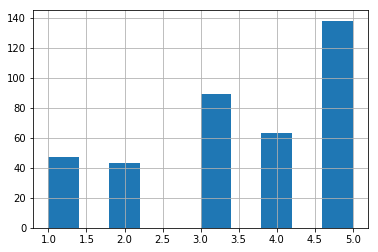

In [52]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.health.value_counts()))
print("Уникальных значений:", math.health.nunique())
math.loc[:, ['health']].info()
math.health.hist()

### absences

In [53]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.absences.value_counts()))
print("Уникальных значений:", math.absences.nunique())
math.loc[:, ['absences']].info()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


Уникальных значений: 36
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
absences    383 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

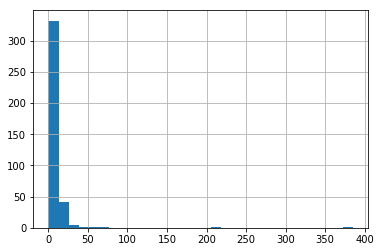

In [54]:
# Проверим на нормальное распределение
math.absences.hist(bins=30)
math.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


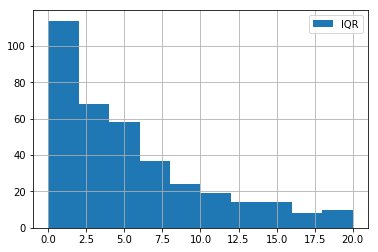

In [55]:
# Проверим это:
median = math.absences.median()
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
math.absences.loc[math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 20), 
                                                                                             label = 'IQR')
plt.legend();

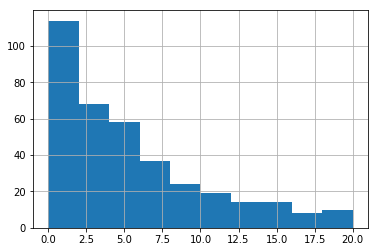

In [56]:
math = math.loc[math.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
math.absences.hist(bins = 10)

### score

,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


Уникальных значений: 17
<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
score    361 non-null float64
dtypes: float64(1)
memory usage: 5.7 KB


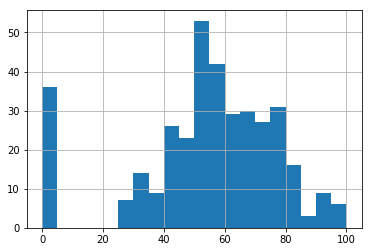

In [57]:
# Проверим на уникальные значения и возможные опечатки
display(pd.DataFrame(math.score.value_counts()))
print("Уникальных значений:", math.score.nunique())
math.loc[:, ['score']].info()
math.score.hist(bins = 20)

In [58]:
# Удалим Nan:
math.score = math.score.dropna(axis = 0)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


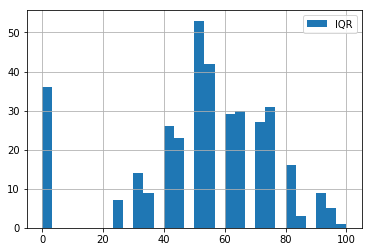

In [59]:
# Проверим на выбросы:
median = math.score.median()
IQR = math.score.quantile(0.75) - math.score.quantile(0.25)
perc25 = math.score.quantile(0.25)
perc75 = math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
math.score.loc[math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, range = (0, 100), 
                                                                                             label = 'IQR')
plt.legend();

In [60]:
math.score = math.score[math.score >0]

25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


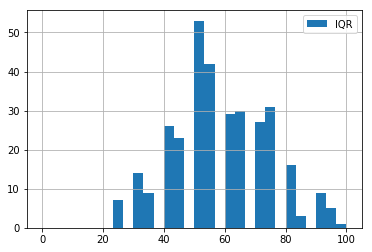

In [61]:
# Проверим на выбросы еще раз:
median = math.score.median()
IQR = math.score.quantile(0.75) - math.score.quantile(0.25)
perc25 = math.score.quantile(0.25)
perc75 = math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
math.score.loc[math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 30, range = (0, 100), 
                                                                                             label = 'IQR')
plt.legend();

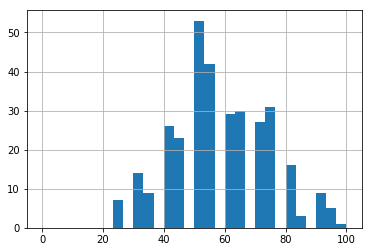

In [62]:
# Проверим полученный результат
math.score.hist(bins=30, range = (0, 100))

In [63]:
#Финально скорректируем данные
math = math.loc[math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [64]:
# Итого получаем следующую таблицу
math.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [65]:
#Посмотрим, есть ли заметные взаимно коррелирующие признаки
check = math.corr()
check[check < 1].max().sort_values(ascending = False).head(10)

Fedu         0.618735
Medu         0.618735
goout        0.283196
freetime     0.283196
failures     0.212319
age          0.212319
absences     0.209530
score        0.197099
famrel       0.150085
studytime    0.147275
dtype: float64

## Анализ номинативных (категориальных) переменных

In [66]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=0)
    ax.set_title('Boxplot for ' + column)
    plt.show()

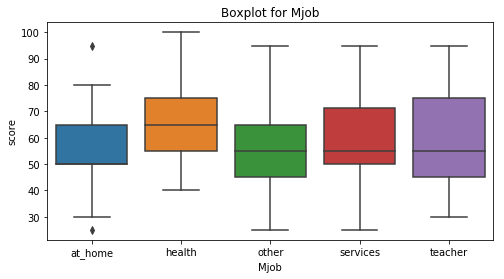

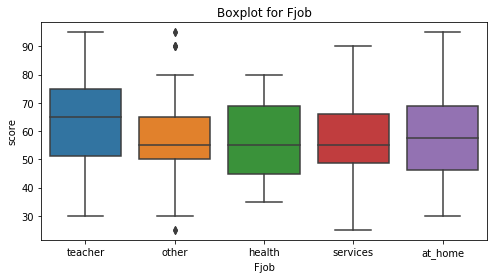

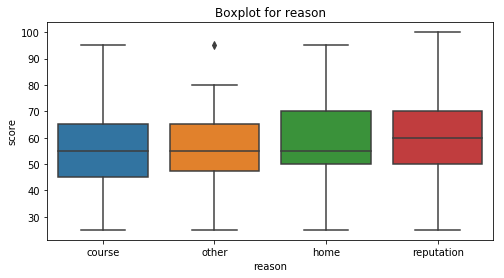

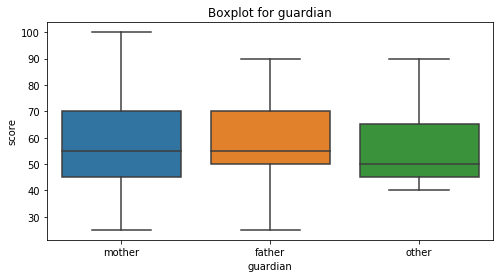

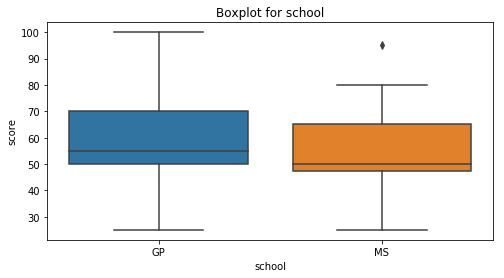

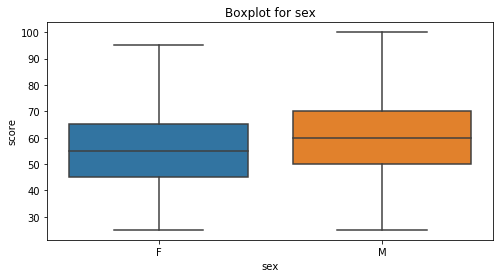

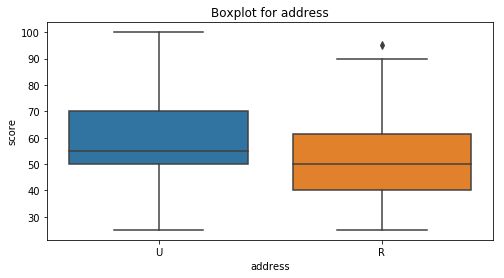

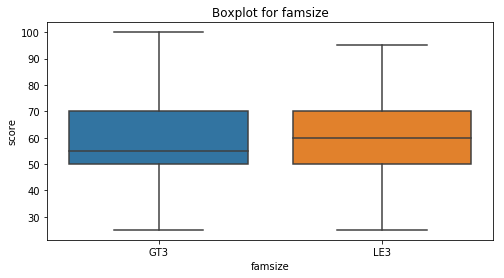

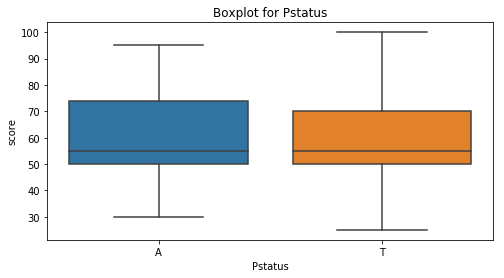

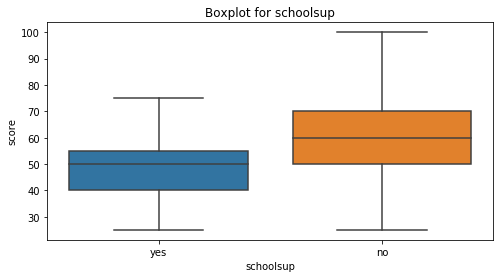

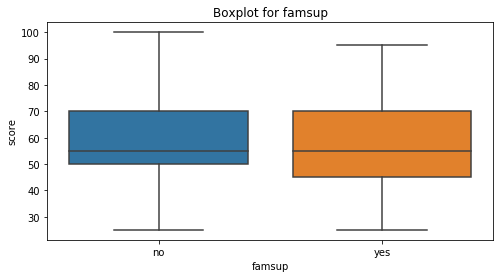

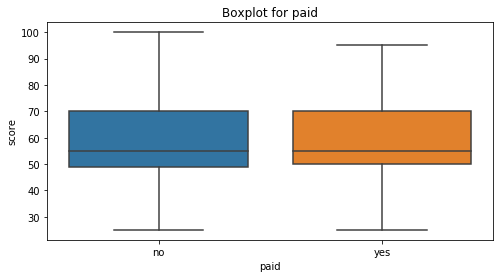

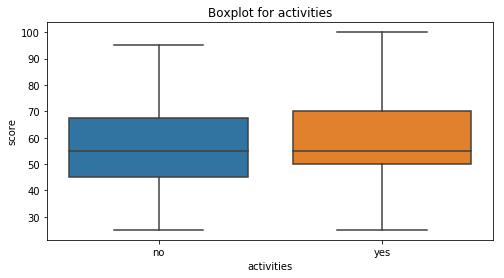

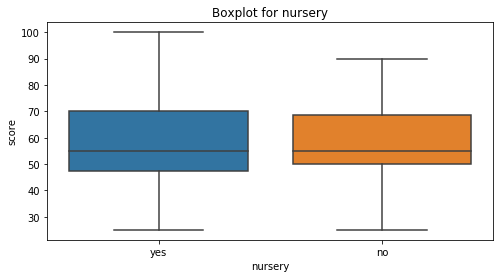

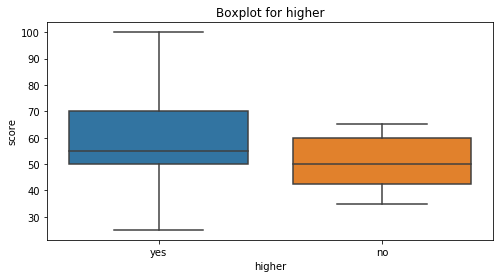

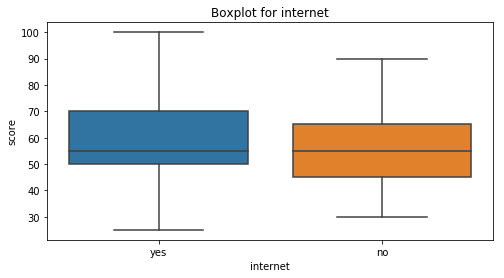

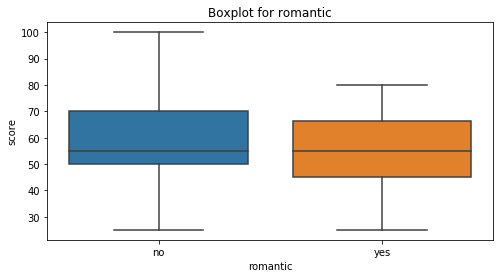

In [67]:
for col in (category_col + binar_col + yes_no_col):
    get_boxplot(col)

In [68]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [69]:
#Запишем суммарный список всех столбцов с категориальными данными
col_sum = category_col + binar_col + yes_no_col

#Применим тест стьюдента для всех столбцов с категориальными данными 
for col in col_sum:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup


In [70]:
#Сформируем список тех столбцов, которые согласно тесту Стьюдента не играют существенной роли.
#Они могут быть удалены

list_to_delete = list(set(col_sum)-set(['Mjob','sex','address','schoolsup']))
list_to_delete

['higher',
 'nursery',
 'romantic',
 'Fjob',
 'Pstatus',
 'famsize',
 'paid',
 'guardian',
 'internet',
 'activities',
 'school',
 'reason',
 'famsup']

In [71]:
# Список столбцов с бинарными категориальными значениями:
print(binar_col) #['school','sex','address','famsize','Pstatus']

# Запустим функцию для преобразования бинарных категориальных значений в значения 1 и 2
for i in binar_col:
    values = math[i].unique()
    math[i] = math[i].apply(lambda x: (list(values).index(x)+1))    

['school', 'sex', 'address', 'famsize', 'Pstatus']


In [72]:
# Напишем функцию для преобразования YES/NO значений в 0/1
def yes_no(x):
    if x == 'yes':
        return 1
    elif x == 'no':
        return 0

# Список столбцов с YES/NO значениями:
print (yes_no_col)

# Применим функцию ко всем столбцам YES/NO значений
for i in yes_no_col:
    math[i] = math[i].apply(yes_no)

['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [73]:
#Скопируем данные в новую модель
math_for_model = math
math_for_model

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,1,1,18,1,1,1,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,1,1,17,1,2,2,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,1,1,15,1,3,3,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1.0,0.0,NaN,0.0,1.0,1.0,1.0,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,1,1,15,1,2,3,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,5.0,2.0,75.0
4,1,1,16,1,2,3,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
5,1,2,16,1,3,3,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,4.0,2.0,5.0,10.0,75.0
6,1,2,16,2,3,3,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,4.0,4.0,3.0,0.0,55.0
7,1,1,17,1,2,1,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,4.0,1.0,6.0,30.0
8,1,2,15,1,3,1,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,2.0,2.0,1.0,0.0,95.0
9,1,2,15,1,1,2,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,5.0,1.0,5.0,0.0,75.0


In [74]:
#Удалим лишние колонки
for i in list_to_delete:
    del math_for_model[i]

In [75]:
#И окончательно очистим таблицу от Nan значений, в итоге получим данные для модели
math_for_model = math_for_model.dropna(axis=0)

In [76]:
#Посмотрим, что получилось
display(pd.DataFrame(math_for_model))
math_for_model.info()

,sex,age,address,Medu,Fedu,Mjob,traveltime,studytime,failures,schoolsup,famrel,freetime,goout,health,absences,score
0,1,18,1,4.0,4.0,at_home,2.0,2.0,0.0,1.0,4.0,3.0,4.0,3.0,6.0,30.0
1,1,17,1,1.0,1.0,at_home,1.0,2.0,0.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,1,15,1,1.0,1.0,at_home,1.0,2.0,3.0,1.0,4.0,3.0,2.0,3.0,10.0,50.0
3,1,15,1,4.0,2.0,health,1.0,3.0,0.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,1,16,1,3.0,3.0,other,1.0,2.0,0.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
5,2,16,1,4.0,3.0,services,1.0,2.0,0.0,0.0,5.0,4.0,2.0,5.0,10.0,75.0
6,2,16,2,2.0,2.0,other,1.0,2.0,0.0,0.0,4.0,4.0,4.0,3.0,0.0,55.0
7,1,17,1,4.0,4.0,other,2.0,2.0,0.0,1.0,4.0,1.0,4.0,1.0,6.0,30.0
9,2,15,1,3.0,4.0,other,1.0,2.0,0.0,0.0,5.0,5.0,1.0,5.0,0.0,75.0
10,1,15,1,4.0,4.0,teacher,1.0,2.0,0.0,0.0,3.0,3.0,3.0,2.0,0.0,45.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 393
Data columns (total 16 columns):
sex           211 non-null int64
age           211 non-null int64
address       211 non-null int64
Medu          211 non-null float64
Fedu          211 non-null float64
Mjob          211 non-null object
traveltime    211 non-null float64
studytime     211 non-null float64
failures      211 non-null float64
schoolsup     211 non-null float64
famrel        211 non-null float64
freetime      211 non-null float64
goout         211 non-null float64
health        211 non-null float64
absences      211 non-null float64
score         211 non-null float64
dtypes: float64(12), int64(3), object(1)
memory usage: 28.0+ KB
